In [2]:
import pandas as pd
import xarray as xr

import numpy as np
import matplotlib.pyplot as plt

from shapely.geometry import Polygon, mapping
import cartopy.feature as cfeat
import cartopy.crs as ccrs
import regionmask
import xesmf as xe
import cmocean

import sys
sys.path.append('../')
import utils
import plotting

import math

# Import Data and Count mortalities

In [3]:
ds_o3 = xr.open_zarr('./final_data/o3_mortalities.zarr')
ds_PM = xr.open_zarr('./final_data/pm_mortalities.zarr')

In [4]:
for ids in ['mean','low','high']:
    print('ozone')
    print('nonuc', ids, ds_o3.sel(model_name = 'nonuc_NA')[f'Δmortality_{ids}'].sum().values)
    print('nonuc_coal', ids, ds_o3.sel(model_name = 'nonuc_coal_NA')[f'Δmortality_{ids}'].sum().values)
    print('PM25')
    print('nonuc', ids, ds_PM.sel( model_name = 'nonuc_NA')[f'Δmortality_{ids}'].sum().values)
    print('nonuc_coal', ids, ds_PM.sel(model_name = 'nonuc_coal_NA')[f'Δmortality_{ids}'].sum().values)

ozone
nonuc mean 2406.4775
nonuc_coal mean 3409.0132
PM25
nonuc mean 7759.334170601242
nonuc_coal mean 8170.545926159869
ozone
nonuc low 1209.1953
nonuc_coal low 1712.9448
PM25
nonuc low 5840.992828150796
nonuc_coal low 6399.964733871637
ozone
nonuc high 4766.2236
nonuc_coal high 6751.827
PM25
nonuc high 9755.066382205296
nonuc_coal high 10022.292768548099


## monetization of the health impacts


In [5]:
VSL = 7.4E6
print('nonuc, O3: ', "{:e}".format((ds_o3['Δmortality_mean'].sel(model_name = 'nonuc_NA').sum()*VSL).values))
print('nonuc/coal, O3: ',"{:e}".format((ds_o3['Δmortality_mean'].sel(model_name = 'nonuc_coal_NA').sum()*VSL).values))
print('nonuc, PM: ',"{:e}".format((ds_PM['Δmortality_mean'].sel(model_name = 'nonuc_NA').sum()*VSL).values))
print('nonuc/coal, PM: ',"{:e}".format((ds_PM['Δmortality_mean'].sel(model_name = 'nonuc_coal_NA').sum()*VSL).values))

nonuc, O3:  1.780793e+10
nonuc/coal, O3:  2.522670e+10
nonuc, PM:  5.741907e+10
nonuc/coal, PM:  6.046204e+10


# Plot

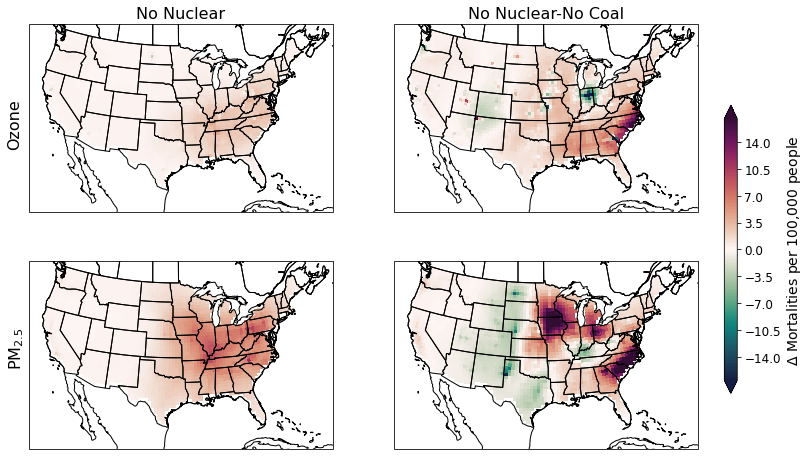

In [6]:
fig = plt.figure(figsize=[12,8])
###O3 No Nuclear plot ###
lev = np.squeeze(np.arange(-17,17.1,.1))
cmap = cmocean.cm.curl
ax_o3 = fig.add_subplot(2,2,1, projection=ccrs.LambertConformal())
pc = (1e5*ds_o3['Δmortality_mean'].sel( model_name = 'nonuc_NA')/ds_o3['regrid_pop_count']).plot(ax = ax_o3,  
                                                                                  add_colorbar=False, 
                                                                                  cmap = cmap,transform=ccrs.PlateCarree(),
                                                                                  levels = lev, 
                                                                                  extend = 'both')
ax_o3.set_title('No Nuclear', fontsize = 16)
ax_o3.add_feature(cfeat.STATES)
ax_o3.coastlines()
ax_o3.set_extent([-120,-70,20,50])

###O3 No Nuclear No Coal plot ###

ax_o3_coal = fig.add_subplot(2,2,2, projection=ccrs.LambertConformal())
pc = (1e5*ds_o3['Δmortality_mean'].sel(model_name = 'nonuc_coal_NA')/ds_o3['regrid_pop_count']).plot(ax = ax_o3_coal,  
                                                                                  add_colorbar=False, 
                                                                                  cmap = cmap,transform=ccrs.PlateCarree(),
                                                                                  levels = lev, 
                                                                                  extend = 'both')
ax_o3_coal.set_title('No Nuclear-No Coal', fontsize = 16)
ax_o3_coal.add_feature(cfeat.STATES)
ax_o3_coal.coastlines()
ax_o3_coal.set_extent([-120,-70,20,50])
###PM No Nuclear plot ###

ax_pm = fig.add_subplot(2,2,3, projection=ccrs.LambertConformal())
(1e5*ds_PM['Δmortality_mean'].sel(model_name = 'nonuc_NA')/ds_PM['regrid_pop_count']).plot(ax = ax_pm, 
                                                         add_colorbar=False, cmap = cmap,
                                                         transform=ccrs.PlateCarree(),
                                                         levels = lev, 
                                                         extend = 'both')
ax_pm.set_title(r' ', fontsize = 16)
ax_pm.add_feature(cfeat.STATES)
ax_pm.coastlines()
ax_pm.set_extent([-120,-70,20,50])
###PM No Nuclear No Coal plot ###
ax_pm_coal = fig.add_subplot(2,2,4, projection=ccrs.LambertConformal())
(1e5*ds_PM['Δmortality_mean'].sel(model_name = 'nonuc_coal_NA')/ds_PM['regrid_pop_count']).plot(ax = ax_pm_coal, 
                                                         add_colorbar=False, cmap = cmap,
                                                         transform=ccrs.PlateCarree(),
                                                         levels = lev, 
                                                         extend = 'both')
ax_pm_coal.set_title(r' ', fontsize = 16)
ax_pm_coal.add_feature(cfeat.STATES)
ax_pm_coal.coastlines()
ax_pm_coal.set_extent([-120,-70,20,50])


cbar_ax = fig.add_axes([.93, 0.23, 0.015, 0.5])
cb = fig.colorbar(pc, cax=cbar_ax)
cbar_ax.tick_params(labelsize=10) 

cb.set_label(label = '$\Delta$ Mortalities per 100,000 people', fontsize=14)
cb.ax.tick_params(labelsize='large')

fig.text(.1,.66,'Ozone', fontsize = 16, rotation = 'vertical')
fig.text(.1,.28,'PM$_{2.5}$', fontsize = 16, rotation = 'vertical')

plt.savefig('./Figures/mortalities.png', bbox_inches = 'tight', dpi = 150)